In [4]:
# # Add this at the VERY TOP of your Jupyter Notebook cell
# %matplotlib inline

# import numpy as np
# import cv2
# from PIL import Image
# from IPython.display import clear_output, display
# import io

# # Create a placeholder for our image
# placeholder = display(Image.new('RGB', (640, 480)), True)

# with TLCameraSDK() as sdk:
#     available_cameras = sdk.discover_available_cameras()
#     if len(available_cameras) < 1:
#         print("no cameras detected")

#     with sdk.open_camera(available_cameras[0]) as camera:
#         # Reset ROI to full sensor size
#         sensor_width = camera.sensor_width_pixels
#         sensor_height = camera.sensor_height_pixels
#         camera.roi = (0, 0, sensor_width, sensor_height)

#         print(f"ROI set to full resolution: {camera.roi}")
#         camera.exposure_time_us = 10000  # set exposure to 11 ms
#         camera.frames_per_trigger_zero_for_unlimited = 0  # continuous mode
#         camera.image_poll_timeout_ms = 1000  # 1 second polling timeout
#         # camera.frame_rate_control_value = 25
#         # camera.is_frame_rate_control_enabled = True

#         camera.arm(2)
#         camera.issue_software_trigger()

#         try:
#             while True:
#                 frame = camera.get_pending_frame_or_null()
#                 if frame is not None:
#                     # Convert frame to RGB image
#                     image_buffer_copy = np.copy(frame.image_buffer)
#                     numpy_shaped_image = image_buffer_copy.reshape(
#                         camera.image_height_pixels, camera.image_width_pixels
#                     )
                    
#                     # Create RGB image
#                     nd_image_array = np.full(
#                         (camera.image_height_pixels, camera.image_width_pixels, 3),
#                         0,
#                         dtype=np.uint8,
#                     )
#                     nd_image_array[:, :, 0] = numpy_shaped_image  # Red
#                     nd_image_array[:, :, 1] = numpy_shaped_image  # Green
#                     nd_image_array[:, :, 2] = numpy_shaped_image  # Blue
                    
#                     # Resize for display
#                     scale_percent = 50  # adjust as needed
#                     width = int(camera.image_width_pixels * scale_percent / 100)
#                     height = int(camera.image_height_pixels * scale_percent / 100)
#                     resized_image = cv2.resize(nd_image_array, (width, height), interpolation=cv2.INTER_AREA)
                    
#                     # Convert to PIL Image and display
#                     pil_image = Image.fromarray(resized_image)
                    
#                     # Update the display instead of creating new ones
#                     clear_output(wait=True)
#                     display(pil_image)
                    
#                 else:
#                     print("Unable to acquire image, program exiting...")
#                     break
                    
#         except KeyboardInterrupt:
#             print("Loop terminated by user")
            
#         finally:
#             camera.disarm()

# print("Program completed")

In [5]:
from thorlabs_tsi_sdk.tl_camera import TLCameraSDK  

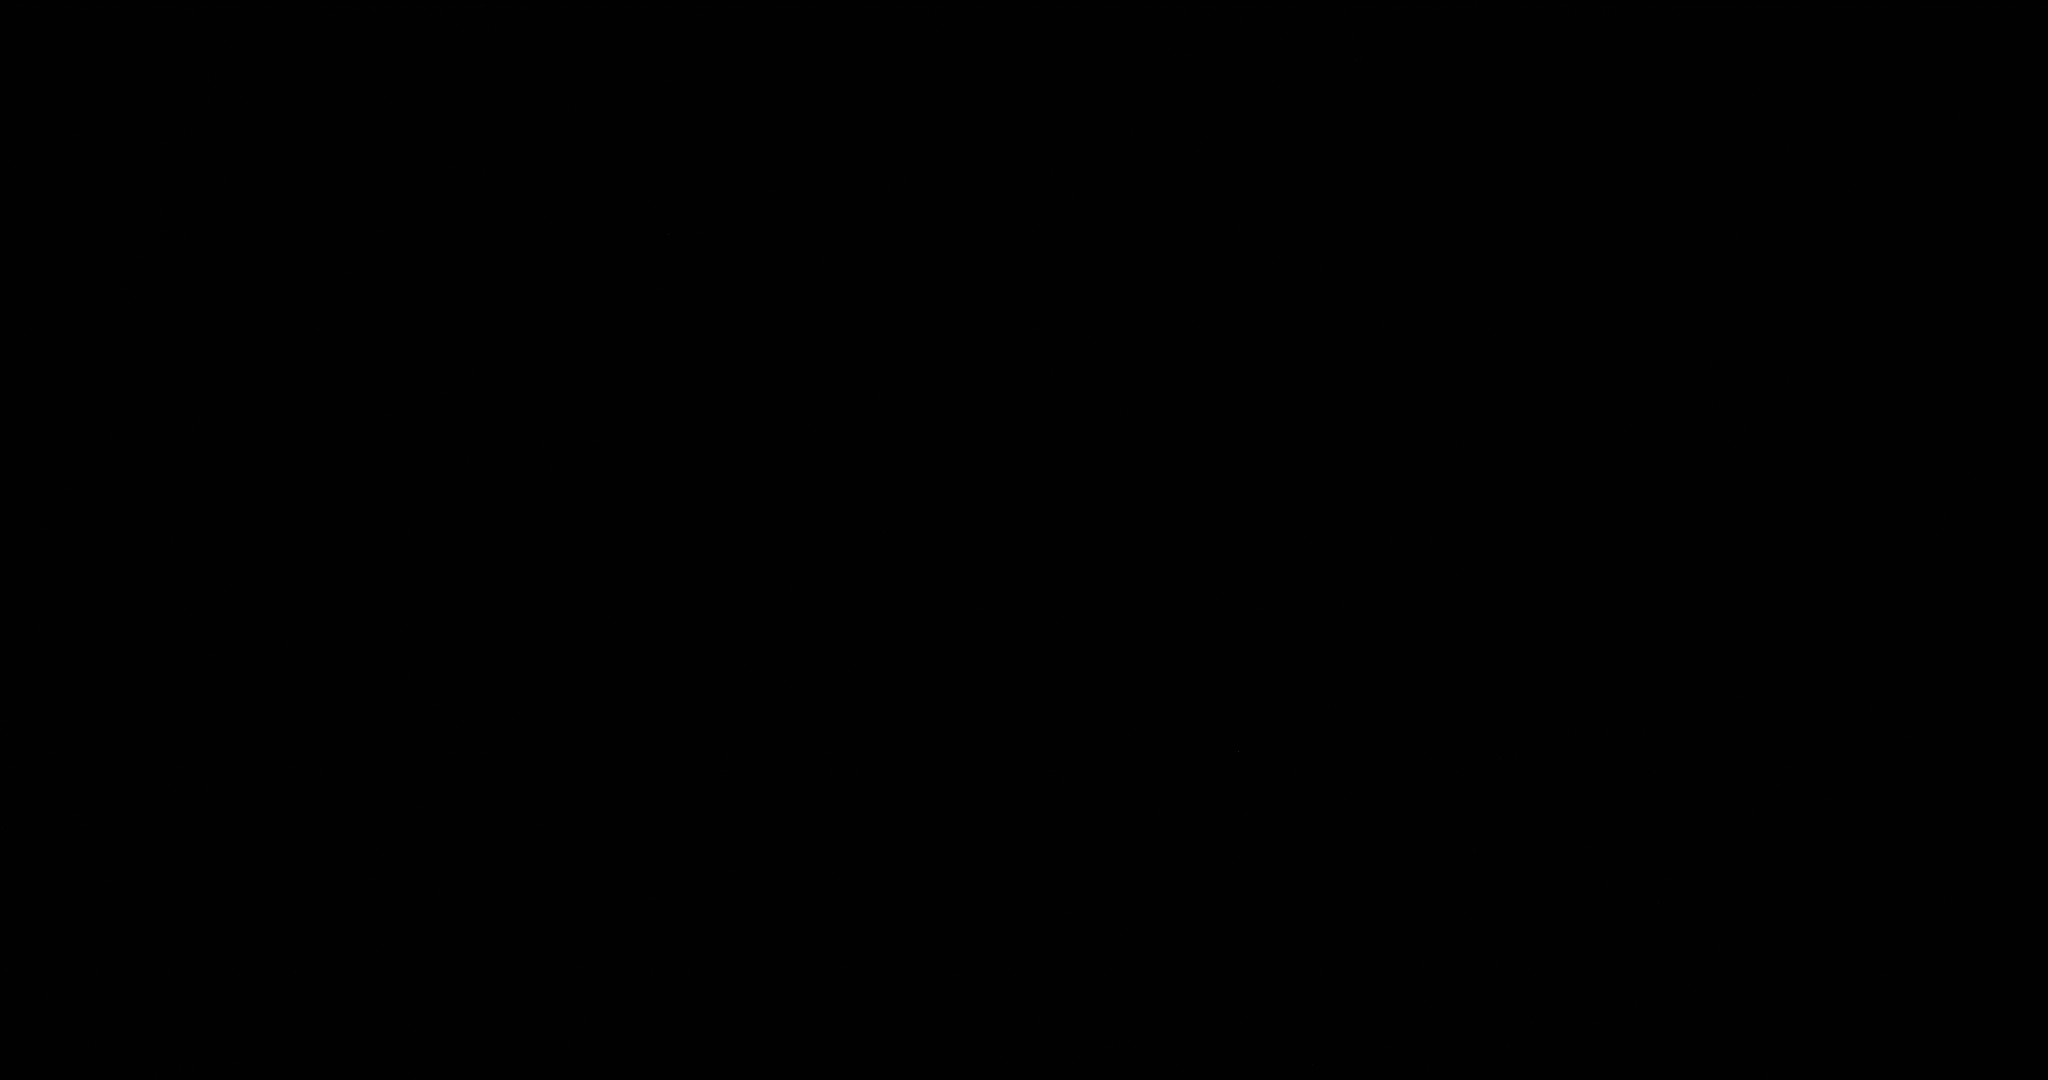

Loop terminated by user
Program completed


In [6]:
# Add this at the VERY TOP of your Jupyter Notebook cell
%matplotlib inline

import numpy as np
import cv2
from PIL import Image
from IPython.display import clear_output, display
import io

# Create a placeholder for our image
placeholder = display(Image.new('RGB', (640, 480)), True)

# Initialize and use the Teledyne Lumenera camera
with TLCameraSDK() as sdk:
    available_cameras = sdk.discover_available_cameras()
    if len(available_cameras) < 1:
        print("No cameras detected")
    else:
        with sdk.open_camera(available_cameras[0]) as camera:
            # Reset ROI to full sensor size
            sensor_width = camera.sensor_width_pixels
            sensor_height = camera.sensor_height_pixels
            camera.roi = (0, 0, sensor_width, sensor_height)

            print(f"ROI set to full resolution: {camera.roi}")
            camera.exposure_time_us = 10000  # set exposure to 10 ms
            camera.frames_per_trigger_zero_for_unlimited = 0  # continuous mode
            camera.image_poll_timeout_ms = 1000  # 1 second polling timeout

            camera.arm(2)
            camera.issue_software_trigger()

            try:
                while True:
                    frame = camera.get_pending_frame_or_null()
                    if frame is not None:
                        # Convert frame to RGB image
                        image_buffer_copy = np.copy(frame.image_buffer)
                        numpy_shaped_image = image_buffer_copy.reshape(
                            camera.image_height_pixels, camera.image_width_pixels
                        )

                        # Create RGB image
                        nd_image_array = np.stack(
                            [numpy_shaped_image] * 3, axis=-1
                        ).astype(np.uint8)

                        # Resize for display
                        scale_percent = 50  # adjust as needed
                        width = int(camera.image_width_pixels * scale_percent / 100)
                        height = int(camera.image_height_pixels * scale_percent / 100)
                        resized_image = cv2.resize(nd_image_array, (width, height), interpolation=cv2.INTER_AREA)

                        # Convert to PIL Image and display
                        pil_image = Image.fromarray(resized_image)

                        # Update the display instead of creating new ones
                        clear_output(wait=True)
                        display(pil_image)

                    else:
                        print("Unable to acquire image, program exiting...")
                        break

            except KeyboardInterrupt:
                print("Loop terminated by user")

            finally:
                camera.disarm()

print("Program completed")


In [ ]:
import nidaqmx

# Create and configure the task
with nidaqmx.Task() as task:
    # Replace "Dev1/ao0" with your device and channel
    # Adjust min_val and max_val based on your device's range (e.g., 0-5V)
    task.ao_channels.add_ao_voltage_chan("Dev1/ao0", min_val=0.0, max_val=5.0)
    
    # Set the voltage
    voltage = 0
    task.write(voltage)
    
    print(f"Voltage set to {voltage}V")

Voltage set to 0V
